# Credit Card Fraud Detection

## Problem Statement:

The Credit Card Fraud Detection Problem includes modeling past credit card transactions with the knowledge of the ones that turned out to be fraud. This model is then used to identify whether a new transaction is fraudulent or not. Our aim here is to detect 100% of the fraudulent transactions while minimizing the incorrect fraud classifications.

#### DataSet : 

The dataset that is used for credit card fraud detection is derived from the following Kaggle URL : [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)

#### Observations

- The data set is highly skewed, consisting of `492` frauds in a total of `284,807` observations. This resulted in only `0.172%` fraud cases. This skewed set is justified by the low number of fraudulent transactions.
- The dataset consists of numerical values from the `28` ‘Principal Component Analysis (PCA)’ transformed features, namely V1 to V28. Furthermore, there is no metadata about the original features provided, so pre-analysis or feature study could not be done.
- The ‘Time’ and ‘Amount’ features are not transformed data.
- There is no missing value in the dataset.

Before getting our hands dirty with the data, first step is to frame the business question. Having clarity on below questions is very crucial because the solution that is being developed will make sense only if we have well stated problem.

#### Business questions to brainstorm:
Since all features are anonymous, we will focus our analysis on non-anonymized features: `Time`, `Amount`
1. How different are the amount of money used in different transactions classes?
2. Do fraudulant transactions occur more often during certain frame?


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [24]:
data = pd.read_csv("data/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


# 1. Exploratory Data Analysis


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [26]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


Let us now check the missing values in the dataset

In [27]:
data.isnull().sum().sum()

0

In [28]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### The only non-transformed variables to work with are:
- `Time`
- `Amount`
- `Class` (1: fraud, 0: not_fraud)

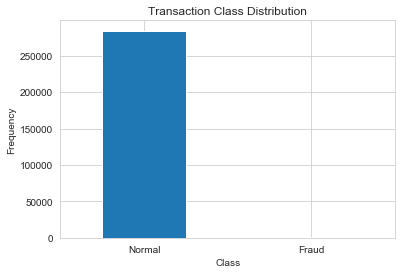

In [29]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [30]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

Determine the number of fraud and valid transactions in the entire dataset.

In [31]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

In [32]:
print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (492, 31)
Shape of Non-Fraudulant transactions: (284315, 31)


How different are the amount of money used in different transaction classes?

In [33]:
pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,492.00,284315.00
mean,122.21,88.29
std,256.68,250.11
min,0.00,0.00
25%,1.00,5.65
50%,9.25,22.00
75%,105.89,77.05
max,2125.87,25691.16


Do fraudulent transactions occur more often during certain time frame ?

In [34]:
pd.concat([fraud.Time.describe(), normal.Time.describe()], axis=1)

,Time,Time
count,492.00,284315.00
mean,80746.81,94838.20
std,47835.37,47484.02
min,406.00,0.00
25%,41241.50,54230.00
50%,75568.50,84711.00
75%,128483.00,139333.00
max,170348.00,172792.00


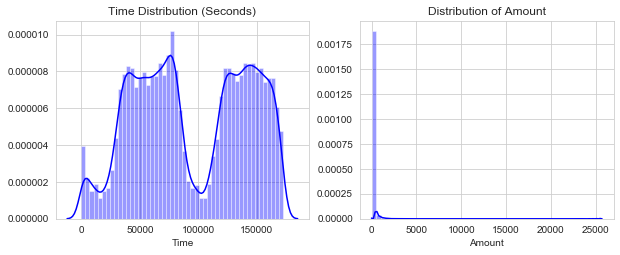

In [35]:
# plot the time feature
plt.figure(figsize=(10,8))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')

sns.distplot(data['Time'], color='blue');

#plot the amount feature
plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.distplot(data['Amount'],color='blue');

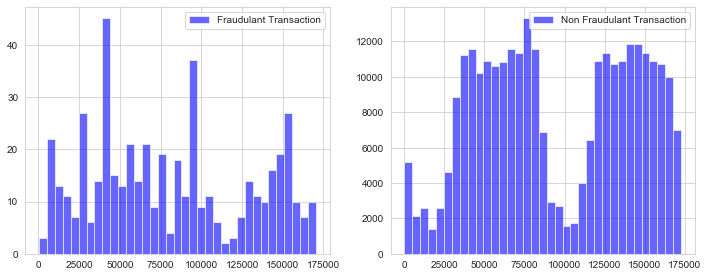

In [36]:
# data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6)
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
data[data.Class == 1].Time.hist(bins=35, color='blue', alpha=0.6, label="Fraudulant Transaction")
plt.legend()

plt.subplot(2, 2, 2)
data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend()

By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

Doesn't seem like the time of transaction really matters here as per above observation.
Now let us take a sample of the dataset for out modelling and prediction

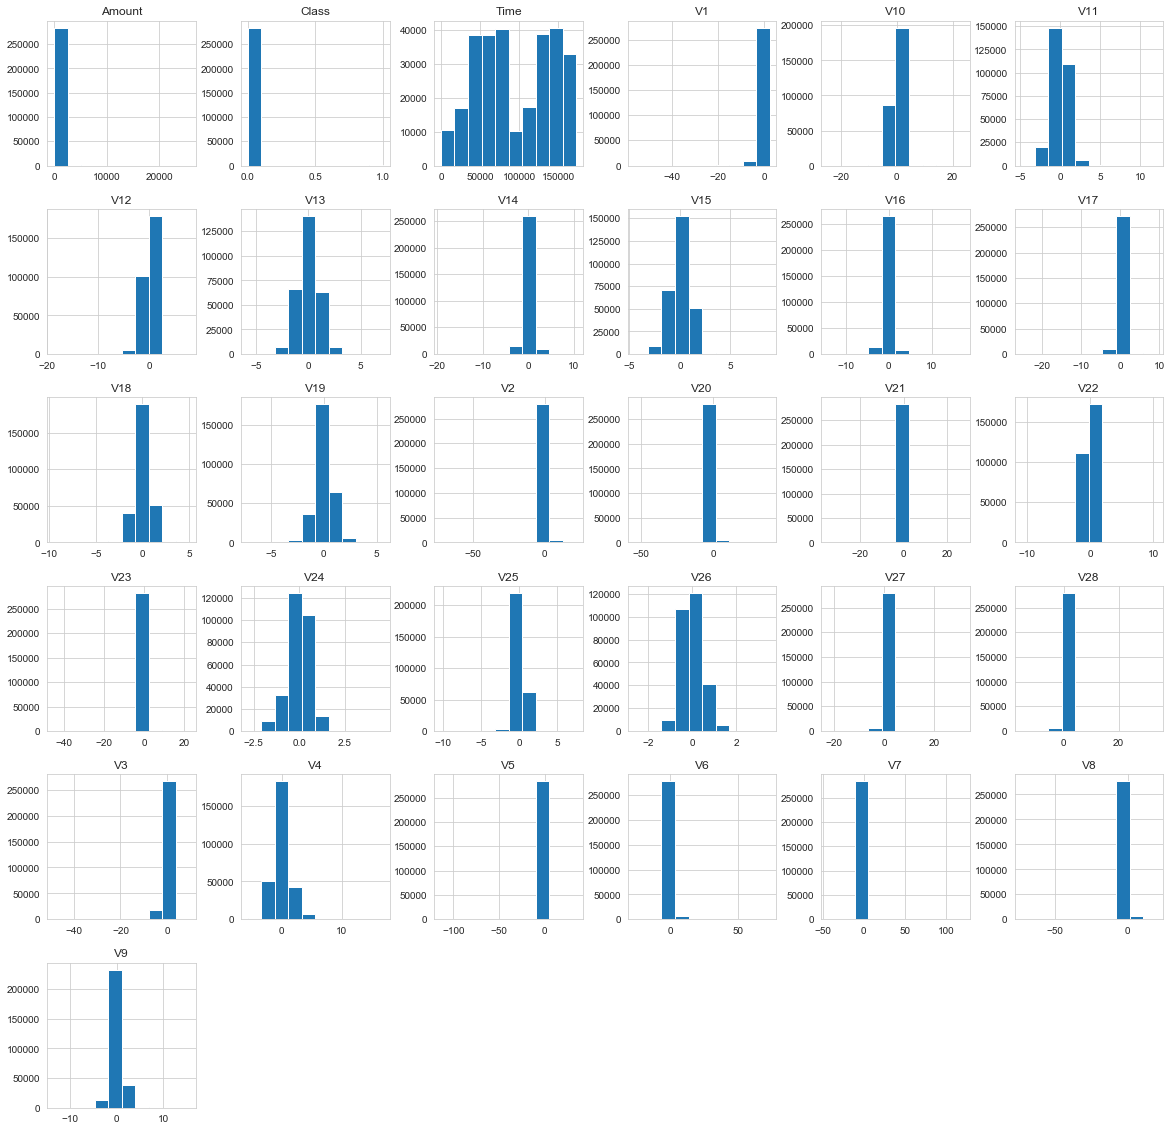

In [37]:
data.hist(figsize=(20, 20));

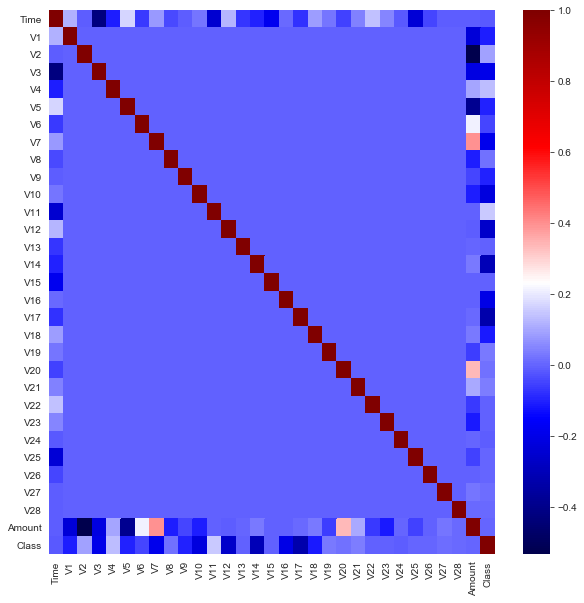

In [38]:
# heatmap to find any high correlations

plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(), cmap="seismic")
plt.show();

### Highest correlations come from:
    - Time & V3 (-0.42)
    - Amount & V2 (-0.53)
    - Amount & V4 (0.4)

- While these correlations are high, I don't expect it to run the risk of multicollinearity.

- The correlation matrix shows also that none of the V1 to V28 PCA components have any correlation to each other however if we observe Class has some form positive and negative correlations with the V components but has no correlation with Time and Amount.

### Data Pre-processing

`Time` and `Amount` should be scaled as the other columns.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = data.drop('Class', axis=1)
y = data.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(label, prediction, train=True):
    if train:
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

# Model Building (Imbalanced Dataset)

# 1. Logistic Regression

In [42]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_val_score, GridSearchCV

# penalty = ['l2']
# C = np.logspace(0, 4, 10, 100, 1000)
# param_grid = dict(C=C, penalty=penalty)

# log_reg = LogisticRegression(solver='lbfgs', max_iter=10000)

# logistic_grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1', verbose=10, n_jobs=-1)
# logistic_grid.fit(X_train, y_train)

# y_train_pred = logistic_grid.predict(X_train)
# y_test_pred = logistic_grid.predict(X_test)

In [43]:
# print_score(y_train, y_train_pred, train=True)
# print_score(y_test, y_test_pred, train=False)

# Artificial Neural Network

In [44]:
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


In [45]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
#                                                             test_size=0.2, random_state=42)

In [46]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
# X_validate = np.array(X_validate)

In [47]:
print(X_train.shape)
print(y_train.shape)
# print(X_validate.shape)
# print(y_validate.shape)

(199364, 30, 1)
(199364,)


In [48]:
print(X_test.shape)
print(y_test.shape)

(85443, 30, 1)
(85443,)


In [49]:
# y_train = np.array(y_train)
# y_test = np.array(y_test)
# y_validate = np.array(y_validate)

In [50]:
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [90]:
epochs = 14
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(1, activation='sigmoid'))

In [91]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_13 (Conv1D)           (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_13 (Batc (None, 29, 32)            128       
_________________________________________________________________
dropout_22 (Dropout)         (None, 29, 32)            0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_14 (Batc (None, 28, 64)            256       
_________________________________________________________________
dropout_23 (Dropout)         (None, 28, 64)            0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1792)             

In [92]:
# weights = {0:1, 1:5}
model.compile(optimizer=Adam(0.0001), loss='binary_crossentropy', metrics=[keras.metrics.AUC()])
r = model.fit(X_train, y_train, 
              validation_data=(X_test, y_test),
              batch_size=50, 
              epochs=epochs, 
#               class_weight=weights
             )

Train on 199364 samples, validate on 85443 samples
Epoch 1/14
199364/199364 [==============================] - 253s 1ms/step - loss: 0.0187 - auc_7: 0.8677 - val_loss: 0.0064 - val_auc_7: 0.9517
Epoch 2/14
199364/199364 [==============================] - 249s 1ms/step - loss: 0.0049 - auc_7: 0.9197 - val_loss: 0.0043 - val_auc_7: 0.9078
Epoch 3/14
199364/199364 [==============================] - 268s 1ms/step - loss: 0.0048 - auc_7: 0.9200 - val_loss: 0.0024 - val_auc_7: 0.9553
Epoch 4/14
199364/199364 [==============================] - 273s 1ms/step - loss: 0.0040 - auc_7: 0.9328 - val_loss: 0.0026 - val_auc_7: 0.9481
Epoch 5/14
199364/199364 [==============================] - 274s 1ms/step - loss: 0.0037 - auc_7: 0.9313 - val_loss: 0.0039 - val_auc_7: 0.9585
Epoch 6/14
199364/199364 [==============================] - 273s 1ms/step - loss: 0.0039 - auc_7: 0.9329 - val_loss: 0.0037 - val_auc_7: 0.9623
Epoch 7/14
199364/199364 [==============================] - 282s 1ms/step - loss: 0.0

In [93]:
score = model.evaluate(X_test, y_test)

85443/85443 [==============================] - 30s 352us/step


In [94]:
print(score)

[0.0027846898181825334, 0.9624561071395874]


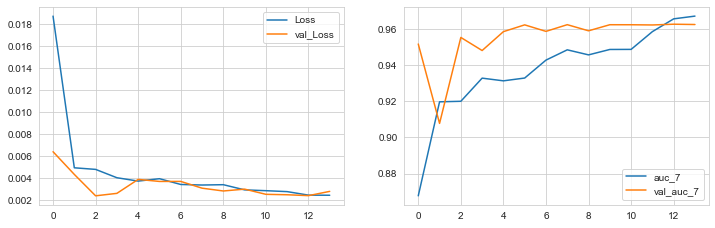

In [95]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(r.history['auc_7'], label='auc_7')
plt.plot(r.history['val_auc_7'], label='val_auc_7')
plt.legend()

In [96]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

Train Result:
Accuracy Score: 99.95%
_______________________________________________
Classification Report:	Precision Score: 86.61%
			Recall Score: 85.39%
			F1 score: 86.00%
_______________________________________________
Confusion Matrix: 
 [[198961     47]
 [    52    304]]

Test Result:
Accuracy Score: 99.94%
_______________________________________________
Classification Report:	Precision Score: 78.91%
			Recall Score: 85.29%
			F1 score: 81.98%
_______________________________________________
Confusion Matrix: 
 [[85276    31]
 [   20   116]]



## Adding MaxPool

In [86]:
epochs = 50
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.1))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(1, activation='sigmoid'))

# weights = {0:1, 1:5}
model.compile(optimizer=Adam(0.0001), loss='binary_crossentropy', metrics=[keras.metrics.AUC()])
r = model.fit(X_train, y_train, 
              validation_data=(X_test, y_test),
              batch_size=50, 
              epochs=epochs, 
#               class_weight=weights
             )

Train on 199364 samples, validate on 85443 samples
Epoch 1/50
199364/199364 [==============================] - 96s 482us/step - loss: 0.0188 - auc_6: 0.7926 - val_loss: 0.0097 - val_auc_6: 0.9626
Epoch 2/50
199364/199364 [==============================] - 95s 477us/step - loss: 0.0081 - auc_6: 0.8918 - val_loss: 0.0059 - val_auc_6: 0.9624
Epoch 3/50
199364/199364 [==============================] - 95s 475us/step - loss: 0.0064 - auc_6: 0.9004 - val_loss: 0.0055 - val_auc_6: 0.9646
Epoch 4/50
199364/199364 [==============================] - 95s 476us/step - loss: 0.0054 - auc_6: 0.9107 - val_loss: 0.0059 - val_auc_6: 0.9716
Epoch 5/50
199364/199364 [==============================] - 95s 478us/step - loss: 0.0049 - auc_6: 0.9224 - val_loss: 0.0036 - val_auc_6: 0.9656
Epoch 6/50
199364/199364 [==============================] - 95s 478us/step - loss: 0.0045 - auc_6: 0.9211 - val_loss: 0.0053 - val_auc_6: 0.9642
Epoch 7/50
199364/199364 [==============================] - 95s 479us/step - lo

In [87]:
score = model.evaluate(X_test, y_test)
print(score)

85443/85443 [==============================] - 14s 164us/step
[0.002199171595576165, 0.9588137269020081]


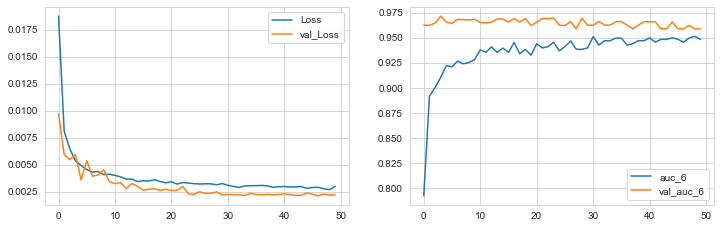

In [88]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(r.history['auc_6'], label='auc_6')
plt.plot(r.history['val_auc_6'], label='val_auc_6')
plt.legend()

In [89]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

Train Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:	Precision Score: 96.59%
			Recall Score: 79.49%
			F1 score: 87.21%
_______________________________________________
Confusion Matrix: 
 [[198998     10]
 [    73    283]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:	Precision Score: 92.44%
			Recall Score: 80.88%
			F1 score: 86.27%
_______________________________________________
Confusion Matrix: 
 [[85298     9]
 [   26   110]]



# 4. XGBoost

In [43]:
# from xgboost import XGBClassifier

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# xgb_model = XGBClassifier(n_estimators=500)

# n_estimators = [100, 250, 500]
# base_score = [0.25, 0.5, 0.75, 0.99]
# learning_rate = [0.01, 0.05, 0.1, 0.5, 0.9]
# # max_depth = [2, 3, 5, 10, 15]
# # booster = ['gbtree', 'gblinear']
# # min_child_weight = [1, 2, 3, 4]
# # weights = [1, 10, 25, 50, 75, 99, 100, 1000]

# hyperparameter_grid = {'n_estimators': n_estimators,  
#                        'learning_rate' : learning_rate, 
#                        'base_score' : base_score,
# #                        'min_child_weight' : min_child_weight,
# #                        'max_depth': max_depth,
# #                        'booster' : booster,  
# #                        'scale_pos_weight':weights
#                       }

# xgb_grid_cv = GridSearchCV(xgb_model, hyperparameter_grid, scoring="roc_auc", 
#                                   n_jobs=-1, verbose=1, cv=3)

# # xgb_grid_cv.fit(X_train, y_train)

In [44]:
# xgb_grid_cv.best_estimator_

In [45]:
# xgb_model = XGBClassifier(n_estimators=500, 
#                           learning_rate=0.1, 
#                           base_score=0.99)
# xgb_model.fit(X_train, y_train)

# y_train_pred = xgb_model.predict(X_train)
# y_test_pred = xgb_model.predict(X_test)

# print_score(y_train, y_train_pred.round(), train=True)
# print_score(y_test, y_test_pred.round(), train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[199008      0]
 [     0    356]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:	Precision Score: 92.31%
			Recall Score: 79.41%
			F1 score: 85.38%
_______________________________________________
Confusion Matrix: 
 [[85298     9]
 [   28   108]]



# Model Building (Imbalanced Dataset)

In [ ]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
from imblearn.over_sampling import SMOTE